# Linear Regression is Machine Learning

In [1]:
from utils.statsimport import *

In [2]:
m_true, b_true = np.array([-1, 1]), 1

def f(x, m, b): return np.dot(m, np.array(x).T) + b

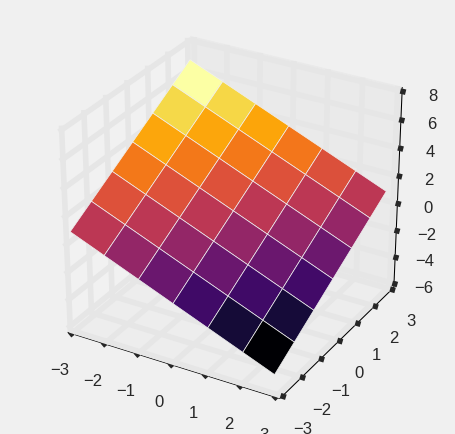

In [3]:
plot_surfaces(f, [-3, 3], [-3, 3], step=0.1, f_params=[m_true, b_true])

# Solve Model Parameters

Determine the parameters $M$ and $b$ for any arbitary set of $(x, y)$ points.

for the simple regression $ f(x) = mx + b$

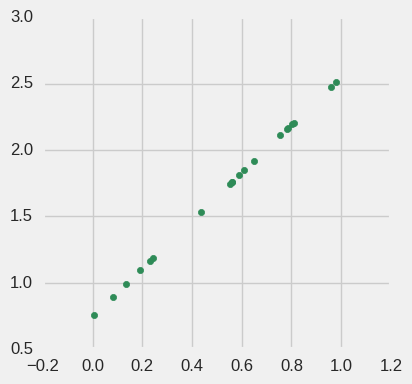

In [4]:
# Parameters
sample_size = 20
m_true, b_true = 1.8, 0.75

# Fake Data
x = np.random.rand(sample_size)
y = f(x, m_true, b_true) # + np.random.normal(loc=0, scale=0.1,size=sample_size)

# Graph results
graph.scatter(x, y, color='seagreen')
graph.show()

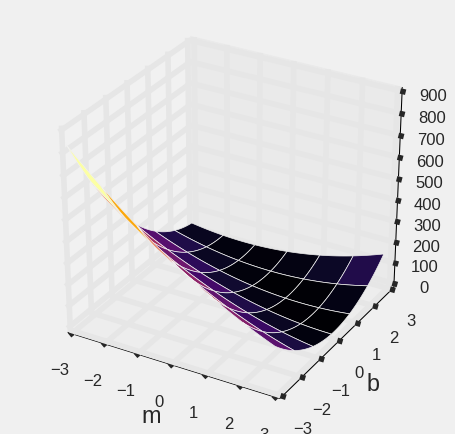

In [5]:
#%matplotlib notebook
# Make a cost function
def f(x_in, m_in, b_in):
    m_in, b_in, x_in = np.array(m_in), np.array(b_in), np.array(x_in)
    return np.dot(m_in, x_in.T) + b_in

def L(params, xi, yi):
    m_in, b_in = params
    return np.sum((yi - f(xi, m_in, b_in)) ** 2)

plot_surfaces(L, [-3, 3], [-3, 3], step=0.1, f_params=[x, y], xlabel='m', ylabel='b')

In [6]:
# Get the derivative
def approx_deriv(m_in, b_in, alpha=1e-15):
    partial_m = (L([m_in + alpha, b_in], x, y) - L([m_in, b_in], x, y)) / alpha
    partial_b = (L([m_in, b_in + alpha], x, y) - L([m_in, b_in], x, y)) / alpha
    return partial_m, partial_b
    
print(approx_deriv(-3, -1))

(-56.843418860808008, -113.68683772161602)


In [12]:
# Move downhill until you reach d/d ~ 0
def fit(tolerance=1e-15, learning_rate=0.03, term=1000):
    i = 0
    m_found, b_found = 0, 0
    last_cost = float('inf')
    
    while np.abs(last_cost - L([m_found, b_found], x, y)) > tolerance:
        last_cost = L([m_found, b_found], x, y)
        print('{}: {} ({}, {})'.format(i, last_cost, m_found, b_found))
        
        # Move
        gradient = approx_deriv(m_found, b_found)
        m_found += (gradient[0] * -learning_rate)
        b_found += (gradient[1] * -learning_rate)
        
        if i > term:
            print('Early Termination')
            break
        i += 1
            
    return round(m_found, 6), round(b_found, 6)

fit()

0: 64.22622037599082 (0, 0)
1: 24.76056665224033 (1.2789769243681803, 2.1316282072803006)
2: 13.209209134907168 (0.3197442310920452, 0.8526512829121202)
3: 6.2787810943341755 (0.9592326932761354, 1.7053025658242404)
4: 4.181783031302816 (0.666133814775094, 1.0391687510491465)
5: 2.980777739209319 (0.9858780458671391, 1.4921397450962104)
6: 2.050520231794346 (0.8792966355031241, 1.0658141036401503)
7: 1.443528648959982 (1.0791367799356522, 1.305622276959184)
8: 1.1215404917822338 (1.0325074129013956, 1.0791367799356522)
9: 0.9566816569786328 (1.1923795284474181, 1.20570220474292)
10: 0.6837521117448951 (1.1790568521519162, 1.0391687510491465)
11: 0.5264051902353782 (1.2789769243681803, 1.0891287871572786)
12: 0.428500286327247 (1.2956302697375577, 1.0091927293842673)
13: 0.35521446410841134 (1.3672396548258803, 1.0275114092905824)
14: 0.30533999045815874 (1.3772316620475067, 0.9592326932761353)
15: 0.2563462608873512 (1.4421797089880783, 0.9875433804040767)
16: 0.2029084593279694 (1.452

(1.8, 0.75)